# ADVANCED CLASSIFICATION METHODS

In this notebook we will solve the classification task defined in Module 1 with the following classification methods:

1. __Naive Bayes Classifier__


2. __Logistic Regression__ 


3. __Support Vector Machines__


4. __Ensemble Methods__


5. __Neural Networks__


6. __Gradient Boosting Machines__


 We will also evaluate each classifier with accuracy, precision, recall, F1-score, ROC curve, Precision-Recall curve.

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
######## Hyperparameter Tuning #######
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

######## Evaluation #######
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [8]:
df_train = pd.read_csv('csv/New_train.csv')
df_test = pd.read_csv('csv/New_test.csv')

In [4]:
to_drop_train = ['ActivityName','Activity','subject','Outlier_label'] 
train = df_train.drop(to_drop_train, axis=1, inplace=False)

to_drop_test = ['ActivityName','Activity','subject'] 
test = df_test.drop(to_drop_test, axis=1, inplace=False)

In [5]:
attributes = [col for col in train.columns if col != 'Class']

X_train = train[attributes].values
y_train = train['Class']

X_test = test[attributes].values
y_test = test['Class']

---

# 1. Naive Bayes Classifier

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [8]:
gnb_pred = gnb.predict(X_test)
gnb_score = gnb.predict_proba(X_test)

In [9]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84      2476
           1       0.41      1.00      0.58       471

    accuracy                           0.77      2947
   macro avg       0.70      0.86      0.71      2947
weighted avg       0.91      0.77      0.80      2947



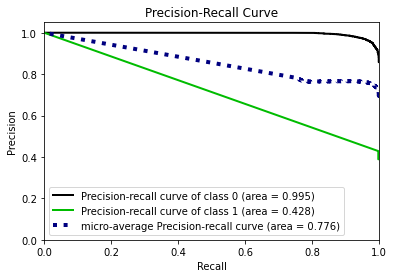

In [10]:
plot_precision_recall(y_test, gnb_score)
plt.show()

---

# 2. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_reg = LogisticRegression(class_weight = 'balanced',
                             random_state = 0,
                             max_iter = 1000)

In [13]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [14]:
log_reg_pred = log_reg.predict(X_test)
log_reg_score = log_reg.predict_proba(X_test)

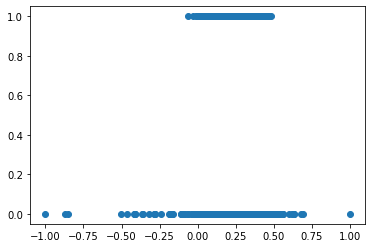

In [15]:
plt.scatter( train.iloc[:, 0] , y_train)     # train.iloc[:, 0] is the first attribute
plt.show()

In [16]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2476
           1       0.97      0.96      0.96       471

    accuracy                           0.99      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.99      0.99      0.99      2947



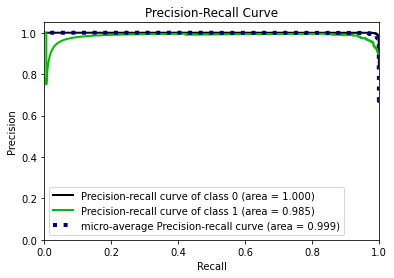

In [17]:
plot_precision_recall(y_test, log_reg_score)
plt.show()

---

# 3. Support Vector Machines

### 3.1 Linear SVM

In [18]:
from sklearn.svm import LinearSVC

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Setting C**: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization 
https://scikit-learn.org/stable/modules/svm.html

In [20]:
recall_list = []
C_list = [0.001, 0.01, 0.1 , 1 , 10]
for k in C_list:
    Linear_SVC = LinearSVC(C = k,
                           class_weight = 'balanced',
                           max_iter = 10000,
                           random_state = 0)
    Linear_SVC.fit(X_train, y_train )
    y_pred = Linear_SVC.predict(X_test)
    recall_list.append(recall_score(y_test, y_pred))

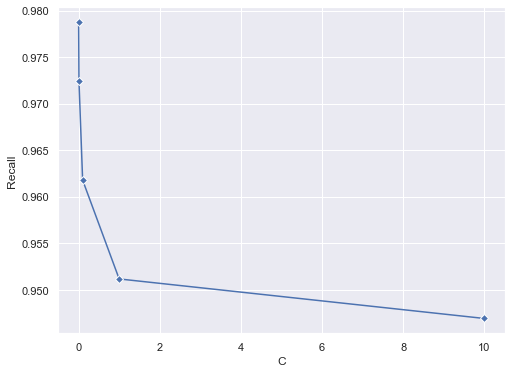

In [21]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(C_list, recall_list, marker='D', mec='white')
plt.xlabel('C')
plt.ylabel('Recall')
plt.show()

In [22]:
Linear_SVC = LinearSVC(C = 1,
                       class_weight = 'balanced',
                       random_state = 0,
                       max_iter = 100000)

In [23]:
Linear_SVC.fit(X_train, y_train )
Linear_SVC_pred = Linear_SVC.predict(X_test)

In [24]:
print(classification_report(y_test, Linear_SVC_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2476
           1       0.97      0.95      0.96       471

    accuracy                           0.99      2947
   macro avg       0.98      0.97      0.98      2947
weighted avg       0.99      0.99      0.99      2947



In [25]:
y_score = Linear_SVC.decision_function(X_test)

### 3.2 Non Linear SVM

In [26]:
from sklearn.svm import SVC

In [27]:
param_dict = { 'gamma': ['scale', 'auto'], 'kernel' : ['poly', 'rbf', 'sigmoid']}

In [28]:
clf = SVC(class_weight='balanced')

In [29]:
RandomizedSearch = RandomizedSearchCV(clf, param_dict, n_iter=6, random_state=42)
RandomizedSearch.fit(X_train, y_train)
res = RandomizedSearch.cv_results_

In [30]:
print("Best estimator found by grid search: ", RandomizedSearch.best_estimator_)

Best estimator found by grid search:  SVC(class_weight='balanced', gamma='auto')


In [31]:
Non_linear_SVC = SVC(class_weight='balanced', gamma='auto', probability = True)

In [32]:
Non_linear_SVC.fit(X_train, y_train)

y_pred = Non_linear_SVC.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9806582965727859
F1-score [0.98847787 0.93980993]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2476
           1       0.93      0.94      0.94       471

    accuracy                           0.98      2947
   macro avg       0.96      0.97      0.96      2947
weighted avg       0.98      0.98      0.98      2947



In [33]:
# Indices of support vectors
Non_linear_SVC.support_

array([  31,   66,   67,   70,   71,   81,   86,  111,  125,  138,  142,
        143,  144,  176,  237,  269,  270,  282,  296,  299,  331,  335,
        336,  341,  342,  442,  446,  465,  467,  469,  470,  472,  473,
        474,  477,  481,  484,  485,  536,  537,  538,  564,  610,  612,
        624,  646,  647,  648,  651,  652,  655,  656,  659,  660,  662,
        690,  691,  767,  768,  772,  809,  811,  861,  920,  933,  935,
       1062, 1077, 1088, 1091, 1092, 1093, 1094, 1105, 1110, 1120, 1122,
       1127, 1128, 1129, 1209, 1238, 1247, 1248, 1249, 1251, 1252, 1253,
       1254, 1255, 1256, 1257, 1258, 1265, 1270, 1271, 1273, 1274, 1279,
       1284, 1285, 1286, 1355, 1369, 1396, 1427, 1436, 1437, 1505, 1513,
       1694, 1699, 1702, 1705, 1706, 1715, 1724, 1725, 1726, 1728, 1730,
       1731, 1732, 1735, 1773, 1813, 1826, 1842, 1843, 1846, 1847, 1849,
       1851, 1854, 1856, 1857, 1858, 1860, 1861, 1862, 1865, 1868, 1873,
       1874, 1981, 1986, 1991, 1992, 1997, 1998, 20

In [34]:
# Number of support vectors for each class.
Non_linear_SVC.n_support_

array([548, 245], dtype=int32)

In [35]:
y_score = Non_linear_SVC.predict_proba(X_test)

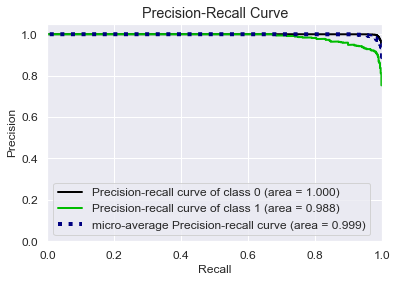

In [36]:
plot_precision_recall(y_test, y_score)
plt.show()

---

# 4. Ensemble Methods

### 4.1 Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

**class_weight parameter**

- The **“balanced”** mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

- The **“balanced_subsample”** mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

**max_features parameter**

If “auto”, then max_features=sqrt(n_features).

In [39]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             random_state=0,
                             class_weight = 'balanced_subsample')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2476
           1       0.93      0.73      0.82       471

    accuracy                           0.95      2947
   macro avg       0.94      0.86      0.89      2947
weighted avg       0.95      0.95      0.95      2947



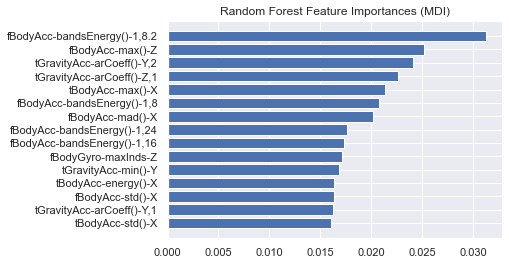

In [43]:
nbr_features = 15

rf_feature_importances = clf.feature_importances_
sorted_idx = rf_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, rf_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [44]:
y_score = clf.predict_proba(X_test)

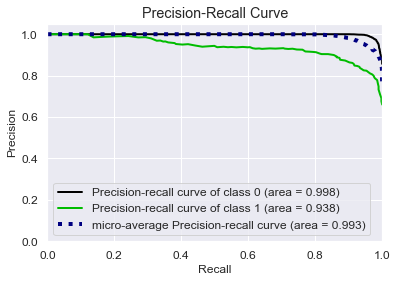

In [45]:
plot_precision_recall(y_test, y_score)
plt.show()

### 4.2 Bagging with decision stamp

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1,
                                               random_state = 0,
                                               class_weight = 'balanced'),
                        n_estimators=100,
                        random_state = 0,)

In [50]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      2476
           1       0.42      0.97      0.59       471

    accuracy                           0.79      2947
   macro avg       0.71      0.86      0.72      2947
weighted avg       0.90      0.79      0.81      2947



In [54]:
y_score = clf.predict_proba(X_test)

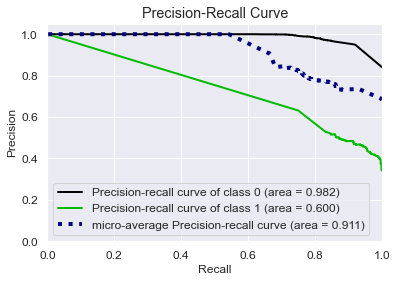

In [55]:
plot_precision_recall(y_test, y_score)
plt.show()

### 4.2 AdaBoost Classifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
clf = AdaBoostClassifier(base_estimator=None, # base_estimator is a decision stamp
                         n_estimators=100, 
                         random_state=0) 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2476
           1       0.95      0.84      0.89       471

    accuracy                           0.97      2947
   macro avg       0.96      0.91      0.93      2947
weighted avg       0.97      0.97      0.97      2947



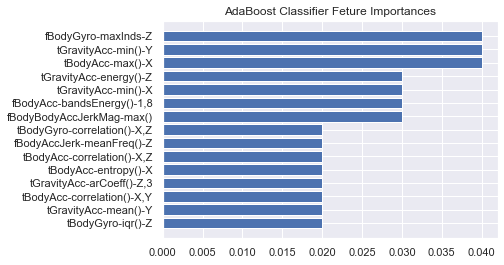

In [60]:
nbr_features = 15

ada_feature_importances = clf.feature_importances_
sorted_idx = ada_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, ada_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("AdaBoost Classifier Feture Importances")
plt.show()

In [61]:
y_score = clf.predict_proba(X_test)

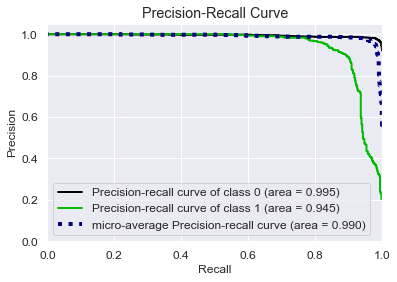

In [62]:
plot_precision_recall(y_test, y_score)
plt.show()

---

# 5. Neural Networks

#### Normalization 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Division in training and validation set

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, 
                                                                     test_size=0.3, 
                                                                     random_state=100, 
                                                                     stratify=y_train)

## Sklearn Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [25]:
clf = MLPClassifier(solver = 'sgd',
                    hidden_layer_sizes=(128, 64, 32,),
                    random_state=0, 
                    activation = 'tanh',
                    learning_rate = 'adaptive',
                    early_stopping=True, 
                    momentum=0.9
                    )

clf.fit(X_training, y_training)

y_pred = clf.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2476
           1       0.93      0.88      0.91       471

    accuracy                           0.97      2947
   macro avg       0.96      0.93      0.94      2947
weighted avg       0.97      0.97      0.97      2947



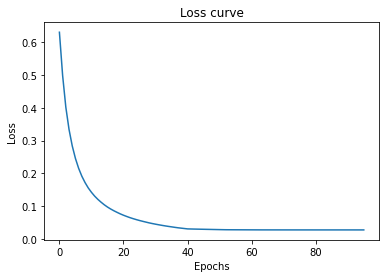

In [33]:
plt.plot(clf.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

In [28]:
clf.out_activation_

'logistic'

In [29]:
y_score = clf.predict_proba(X_test)

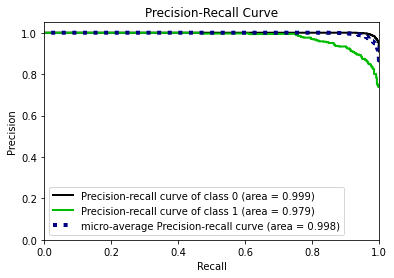

In [30]:
plot_precision_recall(y_test, y_score)
plt.show()

---

# 6. Gradient Boosting Machines

## Gradient Boosting Classifier sklearn

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, 
                                 max_depth=3, 
                                 random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2476
           1       0.90      0.81      0.85       471

    accuracy                           0.96      2947
   macro avg       0.93      0.90      0.91      2947
weighted avg       0.95      0.96      0.95      2947



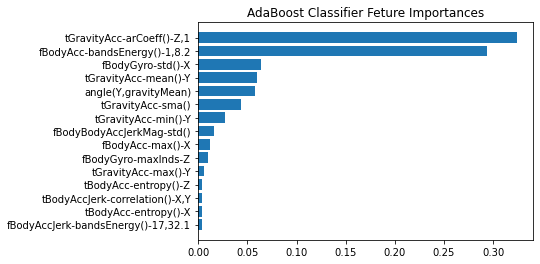

In [36]:
nbr_features = 15

gbc_feature_importances = clf.feature_importances_ 
sorted_idx = gbc_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, gbc_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("Gradient Boosting Classifier Feture Importances")
plt.show()

In [37]:
y_score = clf.predict_proba(X_test)

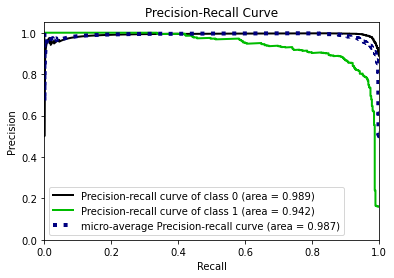

In [38]:
plot_precision_recall(y_test, y_score)
plt.show()